<center><h1>Deep neural networks on SR2 </h1>
John Ignacio R.M. Oct 2020</center>

In [1]:
# Ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada.data import read_dataset, split_dataset
from ada.model import BinaryClassifierModel4 as BC4, BinaryClassifierModel1 as BC1
from ada.plot import plot_confidence_matrix
import pandas as pd

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
# Constants
source_path = "../../processed_data/xtohhOct2020"
dest_path = "../../saved_models/oct_2020"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420
region = "SR"
tag = 2

In [3]:
# Read dataset
df = read_dataset(source_path, signal, bg, region, tag)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


# BC4 on Xtohh2000 in SR2

In [8]:
# Splitting dataset
sets = split_dataset(df, 0.5, 0.3, 0.2, seed)

In [9]:
# Training
model = BC4(sets["x"]["train"].shape[1])
model.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50
)

Train on 4025 samples, validate on 3019 samples
Epoch 1/50
4025/4025 [==============================] - 1s 296us/step - loss: 5.0395e-04 - val_loss: 3.2802e-04
Epoch 2/50
4025/4025 [==============================] - 0s 48us/step - loss: 3.7667e-04 - val_loss: 2.9850e-04
Epoch 3/50
4025/4025 [==============================] - 0s 52us/step - loss: 3.3032e-04 - val_loss: 3.1868e-04
Epoch 4/50
4025/4025 [==============================] - 0s 60us/step - loss: 2.8248e-04 - val_loss: 2.7567e-04
Epoch 5/50
4025/4025 [==============================] - 0s 58us/step - loss: 2.7298e-04 - val_loss: 2.7587e-04
Epoch 6/50
4025/4025 [==============================] - 0s 57us/step - loss: 2.6250e-04 - val_loss: 2.7966e-04
Epoch 7/50
4025/4025 [==============================] - 0s 51us/step - loss: 2.3368e-04 - val_loss: 2.5805e-04
Epoch 8/50
4025/4025 [==============================] - 0s 63us/step - loss: 2.0816e-04 - val_loss: 2.4060e-04
Epoch 9/50
4025/4025 [==============================] - 0s 50us

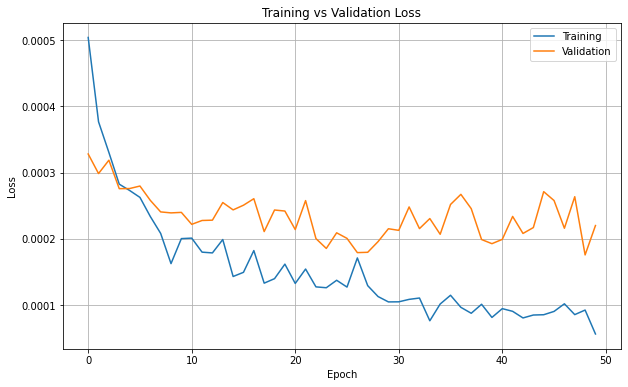

In [10]:
model.plot_loss()

In [21]:
model.save(dest_path, "SR2_Oct2020")

Accuracy: 0.9477748399434254


,0,1,macro avg,weighted avg
precision,0.907519,0.954579,0.931049,0.946576
recall,0.771545,0.983888,0.877717,0.947775
f1-score,0.834026,0.969012,0.901519,0.946055
support,0.397218,1.938392,2.335610,2.335610


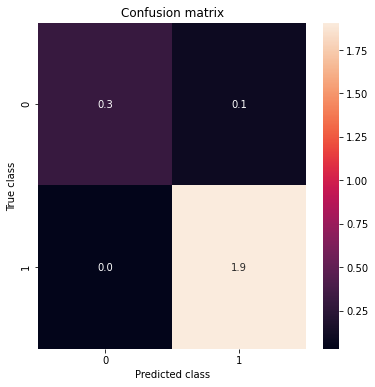

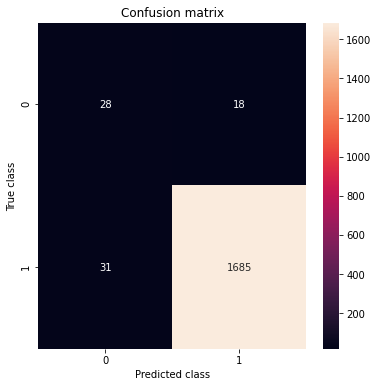

In [20]:
eval = model.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.7,
    save = True, dest_path = "./scores" , name = "SR2_Oct2020",
)
print("Accuracy:", eval["weighted_accuracy"])
display(pd.DataFrame(eval["weighted_class_report"]))
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')
plot_confidence_matrix(eval["cm"], 6, 6, 'd')

# BC1 on Xtohh2000 in SR2 (June model)

In [4]:
# Splitting dataset
sets2 = split_dataset(df, 0.6, 0.2, 0.2, seed)

In [5]:
# Training
model2 = BC1(sets2["x"]["train"].shape[1])
model2.fit(
    sets2["x"]["train"], sets2["y"]["train"], sets2["w"]["train"],
    sets2["x"]["val"], sets2["y"]["val"], sets2["w"]["val"],
    50
)

Train on 5283 samples, validate on 1761 samples
Epoch 1/50
5283/5283 [==============================] - 1s 172us/step - loss: 0.0013 - val_loss: 6.3619e-04
Epoch 2/50
5283/5283 [==============================] - 0s 87us/step - loss: 8.0269e-04 - val_loss: 4.8733e-04
Epoch 3/50
5283/5283 [==============================] - 0s 85us/step - loss: 7.4246e-04 - val_loss: 4.1143e-04
Epoch 4/50
5283/5283 [==============================] - 0s 92us/step - loss: 7.5860e-04 - val_loss: 4.1620e-04
Epoch 5/50
5283/5283 [==============================] - 1s 107us/step - loss: 5.7407e-04 - val_loss: 3.4721e-04
Epoch 6/50
5283/5283 [==============================] - 0s 93us/step - loss: 5.0049e-04 - val_loss: 2.9580e-04
Epoch 7/50
5283/5283 [==============================] - 0s 94us/step - loss: 3.7561e-04 - val_loss: 3.2221e-04
Epoch 8/50
5283/5283 [==============================] - 1s 103us/step - loss: 3.2800e-04 - val_loss: 2.3743e-04
Epoch 9/50
5283/5283 [==============================] - 1s 105us/

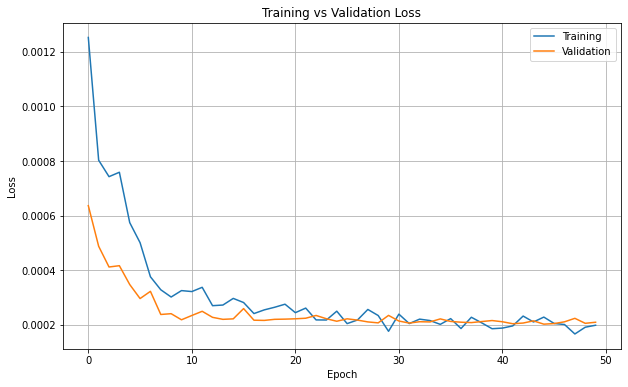

In [6]:
model2.plot_loss()

In [7]:
model2.save(dest_path, "SR2_Oct2020")

Accuracy: 0.9560103656891364


,0,1,macro avg,weighted avg
precision,0.932155,0.960085,0.946120,0.955335
recall,0.799537,0.988075,0.893806,0.956010
f1-score,0.860768,0.973879,0.917323,0.954642
support,0.397218,1.938392,2.335610,2.335610


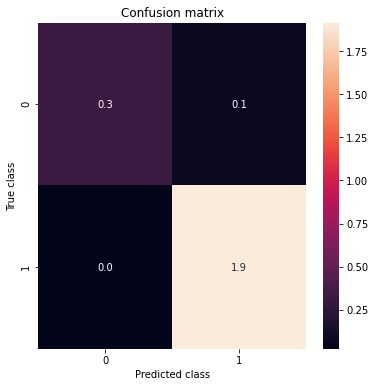

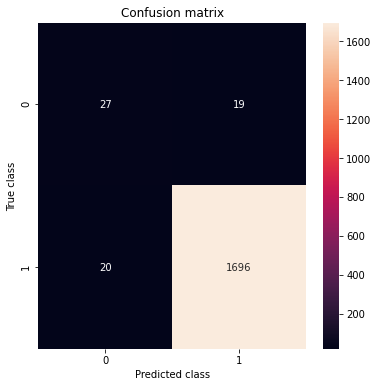

In [8]:
#eval_BC4_SR2_Oct2020.json
eval2 = model2.complete_evaluation(
    sets2["x"]["test"], sets2["y"]["test"], sets2["w"]["test"], 0.4,
    save = True, dest_path = "./scores" , name = "SR2_Oct2020",
)
print("Accuracy:", eval2["weighted_accuracy"])
display(pd.DataFrame(eval2["weighted_class_report"]))
plot_confidence_matrix(eval2["weighted_cm"], 6, 6, '.1f')
plot_confidence_matrix(eval2["cm"], 6, 6, 'd')